Data preprocessing

In [27]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [28]:
# read the dataset
data = pd.read_csv('dataset.csv',nrows=100000)

In [29]:
# delete unecessary columns. These data are not helpful to our research
data.drop('ID', axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)
data.drop("Number", axis=1, inplace=True)
data.drop("Zipcode", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Airport_Code", axis=1, inplace=True)
data.drop("Weather_Timestamp", axis=1, inplace=True)
data.drop("Pressure(in)", axis=1, inplace=True)
data.drop("Wind_Direction", axis=1, inplace=True)
data.drop("Wind_Speed(mph)", axis=1, inplace=True)
data.drop("Precipitation(in)", axis=1, inplace=True)
data.drop("Amenity", axis=1, inplace=True)
data.drop("Bump", axis=1, inplace=True)
data.drop("Crossing", axis=1, inplace=True)
data.drop("Give_Way", axis=1, inplace=True)
data.drop("Junction", axis=1, inplace=True)
data.drop("No_Exit", axis=1, inplace=True)
data.drop("Railway", axis=1, inplace=True)
data.drop("Roundabout", axis=1, inplace=True)
data.drop("Station", axis=1, inplace=True)
data.drop("Stop", axis=1, inplace=True)
data.drop("Traffic_Calming", axis=1, inplace=True)
data.drop("Traffic_Signal", axis=1, inplace=True)
data.drop("Turning_Loop", axis=1, inplace=True)
data.drop("Start_Time", axis=1, inplace=True)
data.drop("End_Time", axis=1, inplace=True)
data.drop("Start_Lat", axis=1, inplace=True)
data.drop("Start_Lng", axis=1, inplace=True)
data.drop("End_Lat", axis=1, inplace=True)
data.drop("End_Lng", axis=1, inplace=True)
data.drop("Wind_Chill(F)", axis=1, inplace=True)

In [30]:
# Delete missing values
# We will remove every row that has at least one missing value (NaN)
data.dropna(axis=0,inplace=True)

In [31]:
# Delete duplicate rows
data.drop_duplicates(inplace = True)

In [32]:
# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [33]:
# select the last 4 columns from the dataset
last_4_columns  = data.iloc[: , -4:]

# convert each record of these columns. Night == 0 and Day == 1
last_4_columns["Sunrise_Sunset"] = np.where(last_4_columns["Sunrise_Sunset"] == "Night", 0, 1)
last_4_columns["Civil_Twilight"] = np.where(last_4_columns["Civil_Twilight"] == "Night", 0, 1)
last_4_columns["Nautical_Twilight"] = np.where(last_4_columns["Nautical_Twilight"] == "Night", 0, 1)
last_4_columns["Astronomical_Twilight"] = np.where(last_4_columns["Astronomical_Twilight"] == "Night", 0, 1)

# find the mean of each row of the last_4_columns dataframe
last_4_columns = last_4_columns.mean(axis=1)

# convert the values of the last_4_rows dataframe into 0 and 1, based in a condition
# if the mean of a row is <0,5, then the value of this row will be 0, else it will be 1
for i in range (len(last_4_columns)):
    if last_4_columns[i] < 0.5:
        last_4_columns[i] = 0
    else:
        last_4_columns[i] = 1

In [34]:
# convert R and L of column 'Side' to 0 and 1 respectively. That means that R is 0 and L is 1.
data["Side"] = np.where(data['Side'] == "R", 0, 1)

In [35]:
# delete the last 4 columns of the dataset
# we do not need them, as we can combine them in a new column
data.drop('Sunrise_Sunset', axis=1, inplace=True)
data.drop('Civil_Twilight', axis=1, inplace=True)
data.drop('Nautical_Twilight', axis=1, inplace=True)
data.drop('Astronomical_Twilight', axis=1, inplace=True)

In [36]:
# add a new column to the dataset.
# this new column will be the "last_4_columns" dataframe that we calculated earlier
data.insert(12,"Day_Night",last_4_columns)

In [37]:
# Converting Day_Night column from float to int
data = data.astype({"Day_Night": int})

In [38]:
# round all the values of "Temperature(F)" column
data["Temperature(F)"] = data["Temperature(F)"].round(0)

In [39]:
# delete outliers from the dataset using the IQR method.
# We will focus only in columns: Temperature(F), Distance(mi), Visibility(mi) and Humidity(%)
for x in ["Temperature(F)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Distance(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Humidity(%)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Visibility(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) - 5 # In order to keep values other than 10 (Ex. 5.5,6,7,8,9,10)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [40]:
# Delete rows that contain nulls (outliers)
data.dropna(axis=0,inplace=True)

# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [41]:
# Discretization of the column "Weather_Condition"

# we have separated all unique weather conditions of the dataset into three lists (bad_weather,medium_weather and perfect_weather).
# This separation has been done according to our opinion.
bad_weather = ['Patches of Fog','Haze','Smoke','Light Snow','Snow Grains','Squalls','Shallow Fog','Thunderstorm','Light Ice Pellets','Light Thunderstorms and Rain','Thunder','Thunder in the Vicinity','Thunderstorms and Rain',
'Heavy Rain','Widespread Dust','Blowing Dust / Windy','Blowing Snow','Tornado','Light Snow / Windy','Fog','Mist','Light Snow Showers','T-Storm','T-Storm / Windy','Wintry Mix','Volcanic Ash','Light Rain with Thunder',
'Heavy Thunderstorms and Rain', 'Haze / Windy',
'Dust Whirls','Light Snow and Sleet','Thunder / Windy','Snow','Heavy T-Storm / Windy','Heavy T-Storm','Light Snow and Sleet / Windy','Heavy Drizzle',
'Light Sleet','Sand / Dust Whirlwinds','Patches of Fog / Windy','Low Drifting Snow','Blowing Snow Nearby','Heavy Rain / Windy','Squalls / Windy','Sand / Dust Whirls Nearby',
'Wintry Mix / Windy','Sleet']

medium_weather = ['Light Rain','Overcast','Mostly Cloudy', 'Cloudy','Scattered Clouds','Drizzle','Light Drizzle','Light Freezing Drizzle','Rain','Fair / Windy','Light Freezing Rain','Cloudy / Windy','Partly Cloudy / Windy',
'Light Rain Showers','Light Rain / Windy','Mostly Cloudy / Windy','Blowing Dust','Funnel Cloud','Light Rain Shower','Smoke / Windy','Light Rain Shower / Windy','Rain Shower','Sand / Dust Whirlwinds / Windy','Rain Showers',
'Light Drizzle / Windy','Showers in the Vicinity','Widespread Dust / Windy','Light Freezing Rain / Windy''N/A Precipitation','Rain / Windy',
'Light Sleet / Windy','Hail','Drizzle / Windy','Light Haze']

perfect_weather = ['Clear','Fair','Partly Cloudy','Small Hail']

# change the values of the column "Weather_Condition" column
# Now, column "Weather_Condition" has only records: "Bad","Medium" and "Perfect"
for i in range(len(data["Weather_Condition"])):
    if data["Weather_Condition"][i] in bad_weather:
        data.at[i,"Weather_Condition"] = "Bad"

    elif data["Weather_Condition"][i] in medium_weather:
        data.at[i,"Weather_Condition"] = "Medium"
    else:
         data.at[i,"Weather_Condition"] = "Perfect"

In [42]:
# Change content of column "Weather_Condition"

# 1 is for Bad, 2 is for Medium and 3 is for Perfect
data['Weather_Condition'] = data['Weather_Condition'].replace(['Bad','Medium','Perfect'],['1','2','3'])

In [43]:
# Convert data type of column 'Weather_Condition' to int
data = data.astype({"Weather_Condition": int})

In [44]:
# Convert 'State' column of the dataframe into numbers ()
 
# instance of label Encoder
le = LabelEncoder()
 
# encode column 'State' and return encoded label
label = le.fit_transform(data['State'])

# insert new column to the dataset
data.insert(7,"State_Number",label)

,Severity,Distance(mi),Street,Side,City,County,State,State_Number,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night
0,2,0.747,I-70 E,0,Dayton,Montgomery,OH,33,US/Eastern,37.0,91.0,10.0,2,0
1,2,0.055,I-75 S,0,Cincinnati,Hamilton,OH,33,US/Eastern,36.0,97.0,10.0,2,0
2,2,0.123,I-77 N,0,Akron,Summit,OH,33,US/Eastern,39.0,55.0,10.0,2,1
3,3,0.500,I-75 S,0,Cincinnati,Hamilton,OH,33,US/Eastern,37.0,93.0,10.0,2,1
4,2,1.427,State Route 32,0,Williamsburg,Clermont,OH,33,US/Eastern,36.0,100.0,10.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77640,2,0.171,Vine Street Expy E,0,Philadelphia,Philadelphia,PA,35,US/Eastern,75.0,23.0,10.0,2,1
77641,2,0.161,Brooklyn Queens Expy,0,Brooklyn,Kings,NY,32,US/Eastern,73.0,31.0,10.0,3,1
77642,2,0.098,I-295 S,0,Bellmawr,Camden,NJ,29,US/Eastern,75.0,23.0,10.0,2,1
77643,3,0.407,Whitestone Expy N,0,Whitestone,Queens,NY,32,US/Eastern,75.0,28.0,10.0,2,1


Data visualization - Preprocessing stage

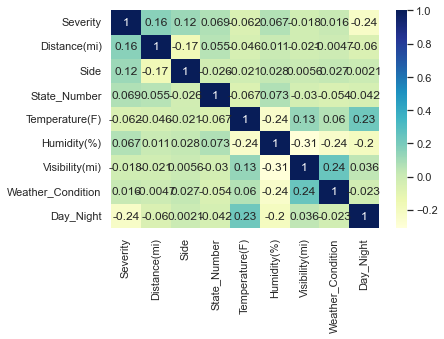

In [45]:
# show the correlation of data using Heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Clustering using K-Means

Let's find our more information that are hidden inside the dataset.

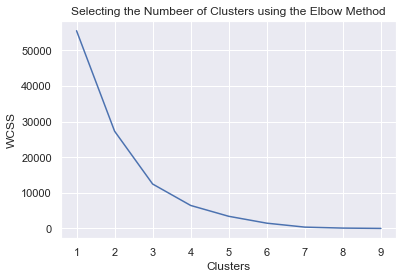

In [46]:
############################################################
# CLUSTER DATASET BASED ON Severity AND Weather Condition  #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset

X = data[['Severity', 'Weather_Condition']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


Optimum K is 

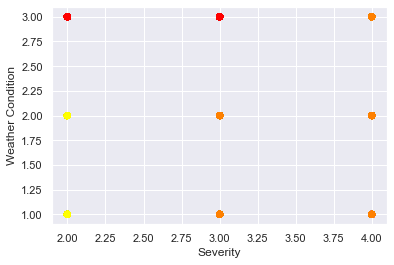

In [47]:
# K-means implementation and visualization of the effect
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)

plt.scatter(X['Severity'], X['Weather_Condition'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

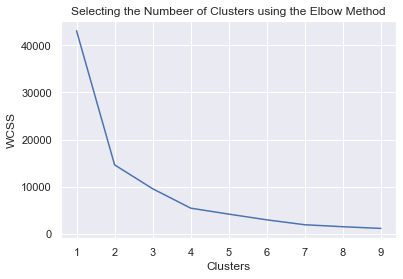

In [48]:
############################################################
# CLUSTER DATASET BASED ON Severity AND Distance           #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
Y = data[['Severity', 'Distance(mi)']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


Optimum K is

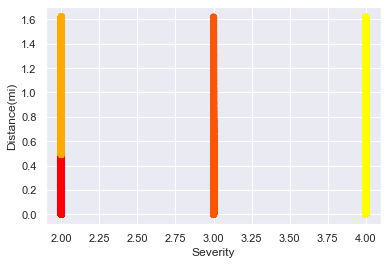

In [49]:
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(Y)

plt.scatter(Y['Severity'], Y['Distance(mi)'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('Distance(mi)')
plt.show()

Implementing K-means algorithm in order to cluster the dataset based in States and Severity columns

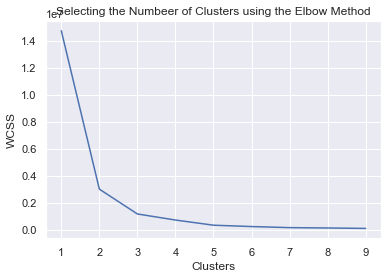

In [50]:
#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
H = data[['Severity', 'State_Number']].copy()

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(H)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is 3

In [51]:
kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(H)

plt.scatter(H['Severity'], H['StateNumber'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('StateNumber')
plt.show()

KeyError: 'StateNumber'

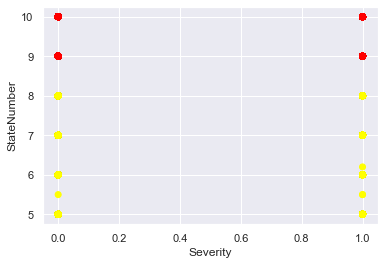

In [ ]:
D = data[['Day_Night', 'Visibility(mi)']].copy()
#D = data[['Day_Night','Vibility(mi)']].copy()

kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(D)

plt.scatter(D['Day_Night'], D['Visibility(mi)'],c=y,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('StateNumber')
plt.show()